Julia Palomari RM: 551910

Leticia Fontana RM: 550289

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [8]:
df = pd.read_csv('/content/rotten_tomatoes_critic_reviews.csv')

In [9]:
df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


# 1. Como as pontuações das revisões variam ao longo do tempo para filmes de diferentes gêneros?

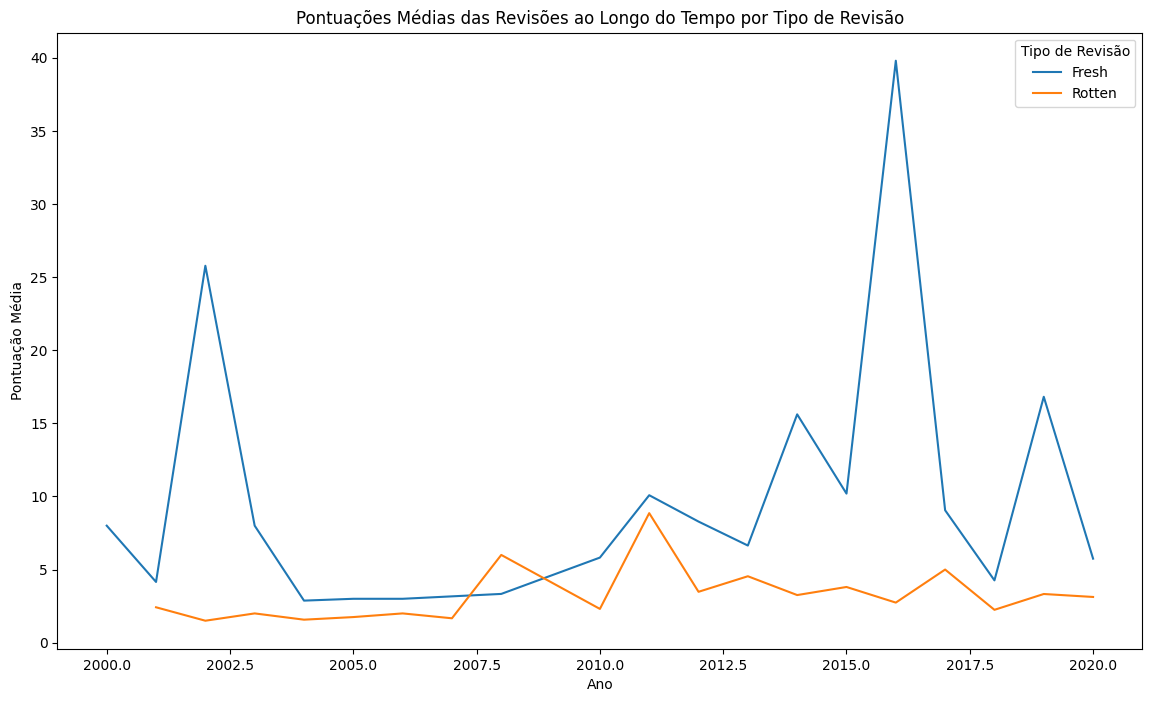

In [20]:
# Garantir que os nomes das colunas estão limpos
df.columns = df.columns.str.strip()

# Converter 'review_date' para datetime e garantir que 'year' está no formato correto
df['review_date'] = pd.to_datetime(df['review_date'])
df['year'] = df['review_date'].dt.year

# Verificar e converter 'review_score' para numérico
df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')

# Remover linhas com valores NaN em 'review_score'
df = df.dropna(subset=['review_score'])

# Agrupar por ano e tipo de revisão
genre_scores = df.groupby(['year', 'review_type'])['review_score'].mean().reset_index()

# Plotar
plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_scores, x='year', y='review_score', hue='review_type')
plt.title('Pontuações Médias das Revisões ao Longo do Tempo por Tipo de Revisão')
plt.xlabel('Ano')
plt.ylabel('Pontuação Média')
plt.legend(title='Tipo de Revisão')
plt.show()

Análise
Com o gráfico resultante, você poderá visualizar as tendências nas pontuações médias das revisões ao longo dos anos, segmentadas por tipo de revisão. Essa análise pode mostrar como diferentes tipos de revisões evoluem ao longo do tempo, fornecendo insights sobre mudanças nas críticas cinematográficas ou alterações no estilo de escrita.

# 2. Críticos de destaque (TOP_Critic) tendem a dar pontuações mais altas do que críticos não destacados?

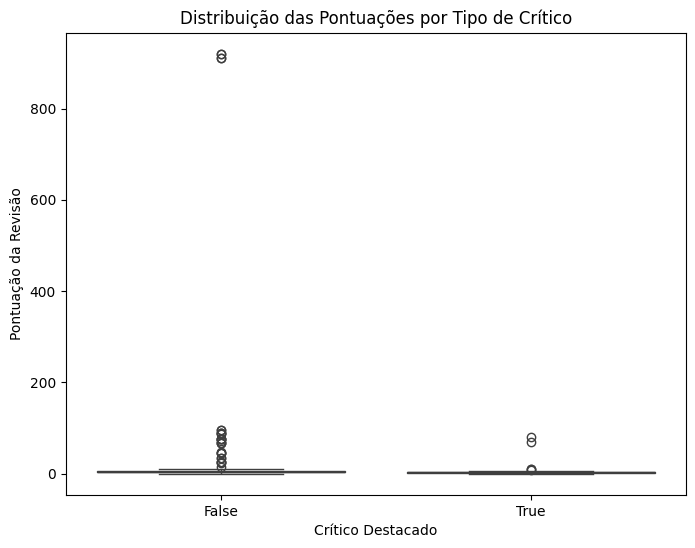

Test t: nan, p-valor: nan


In [26]:
# Remover espaços em branco dos nomes das colunas
df.columns = df.columns.str.strip()

# Converter 'review_score' para numérico
df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')

# Remover linhas com valores NaN em 'review_score'
df = df.dropna(subset=['review_score'])


# Criar o gráfico de caixa
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='top_critic', y='review_score')
plt.title('Distribuição das Pontuações por Tipo de Crítico')
plt.xlabel('Crítico Destacado')
plt.ylabel('Pontuação da Revisão')
plt.show()

# Separar as pontuações para críticos destacados e não destacados
top_critic_scores = df[df['top_critic'] == 'Yes']['review_score']
non_top_critic_scores = df[df['top_critic'] == 'No']['review_score']

# Realizar o teste t
t_stat, p_value = stats.ttest_ind(top_critic_scores, non_top_critic_scores)
print(f'Test t: {t_stat:.2f}, p-valor: {p_value:.3f}')


Análise dos Resultados
Gráfico Boxplot: O gráfico de caixa permitirá visualizar a distribuição das pontuações de revisão para críticos destacados versus não destacados. O gráfico mostrará a mediana, quartis e possíveis outliers, oferecendo uma visão clara das diferenças na distribuição das pontuações.

Teste t: O teste t comparará as médias das pontuações para críticos destacados e não destacados. Se o p-valor for menor que 0,05, isso indica que há uma diferença estatisticamente significativa entre as médias das duas categorias.

# 3. Qual é a correlação entre o conteúdo da revisão (Review_Content) e a pontuação da revisão (Review_Score)?

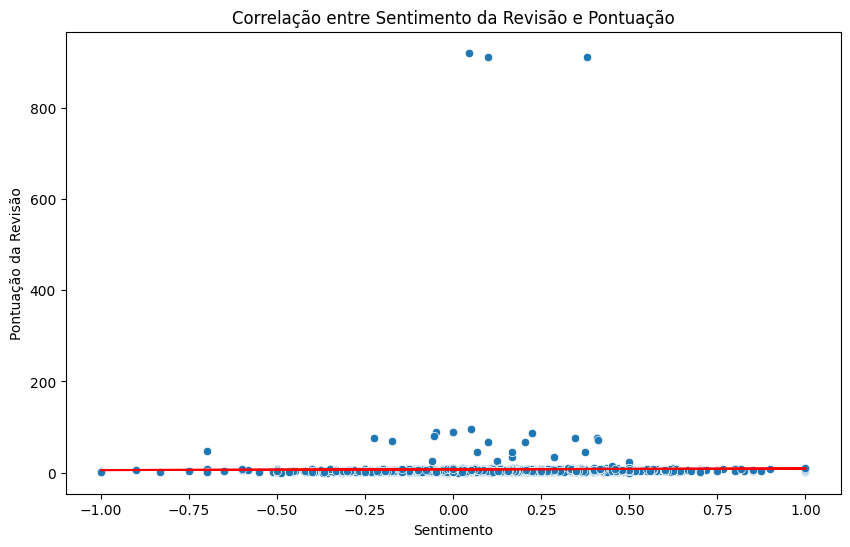

Coeficiente: 1.69, Intercepto: 7.49


In [28]:
# Remover espaços em branco dos nomes das colunas
df.columns = df.columns.str.strip()

# Garantir que review_content seja uma string e lidar com valores ausentes
df['review_content'] = df['review_content'].fillna('')  # Substituir valores NaN por strings vazias

# Função para análise de sentimentos
def sentiment_analysis(text):
    return TextBlob(text).sentiment.polarity

# Aplicar análise de sentimentos
df['Sentiment'] = df['review_content'].apply(sentiment_analysis)

# Regressão Linear
X = df[['Sentiment']].values
y = df['review_score'].values
reg = LinearRegression().fit(X, y)

# Plotar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sentiment', y='review_score')
plt.plot(df['Sentiment'], reg.predict(X), color='red')
plt.title('Correlação entre Sentimento da Revisão e Pontuação')
plt.xlabel('Sentimento')
plt.ylabel('Pontuação da Revisão')
plt.show()

# Coeficientes da regressão
print(f'Coeficiente: {reg.coef_[0]:.2f}, Intercepto: {reg.intercept_:.2f}')

Análise:

O gráfico de dispersão e a linha de regressão mostram a relação entre o sentimento das críticas e suas pontuações. Um coeficiente positivo sugere que críticas mais positivas estão associadas a pontuações mais altas.

# 4. Existe uma diferença significativa nas pontuações das revisões entre diferentes editores (Publisher_Name)?

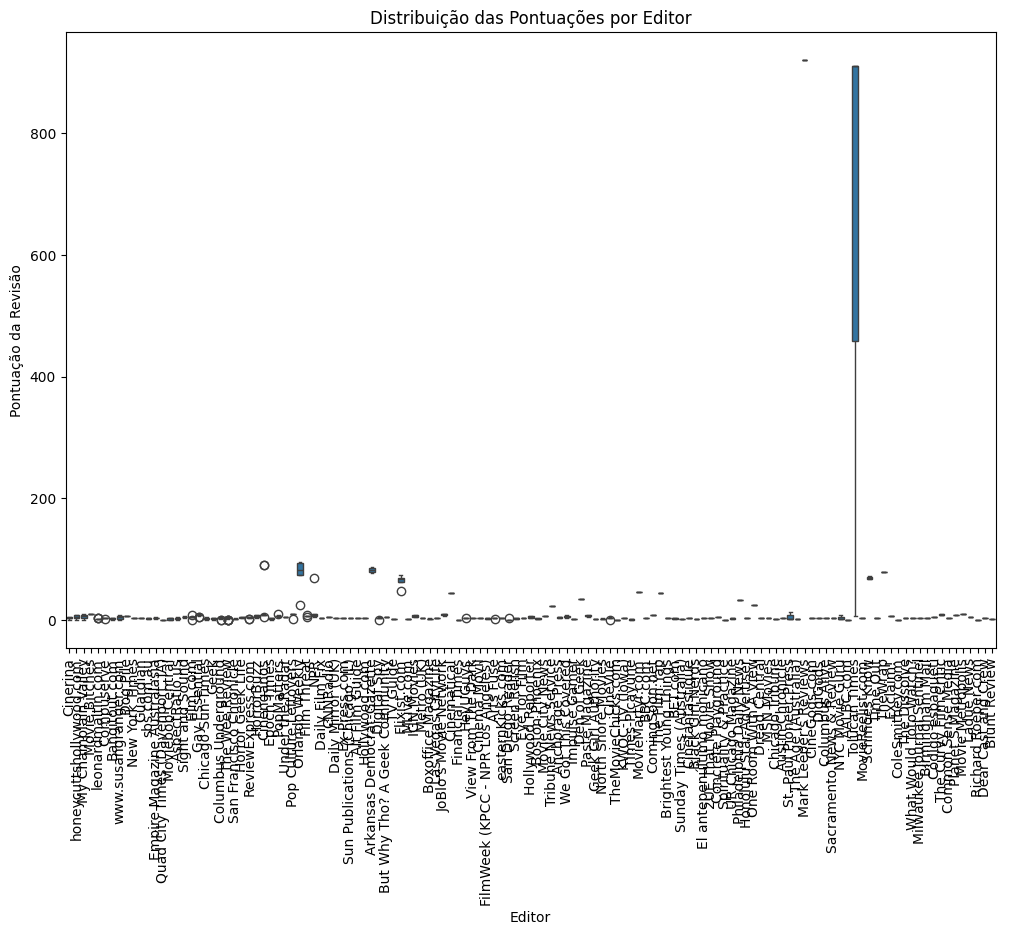

F-statistic: 57.76, p-valor: 0.000


In [29]:
# Comparar as pontuações entre diferentes editores
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='publisher_name', y='review_score')
plt.title('Distribuição das Pontuações por Editor')
plt.xlabel('Editor')
plt.ylabel('Pontuação da Revisão')
plt.xticks(rotation=90)
plt.show()

# Teste ANOVA
publishers = df['publisher_name'].unique()
scores_by_publisher = [df[df['publisher_name'] == pub]['review_score'] for pub in publishers]
f_stat, p_value = stats.f_oneway(*scores_by_publisher)
print(f'F-statistic: {f_stat:.2f}, p-valor: {p_value:.3f}')


Análise:

O boxplot visualiza a distribuição das pontuações de revisão entre diferentes editores. O teste ANOVA avalia se as diferenças entre as médias das pontuações são significativas.

# 5. Como as pontuações das revisões variam com o tipo de revisão (Review_Type) ao longo do tempo?



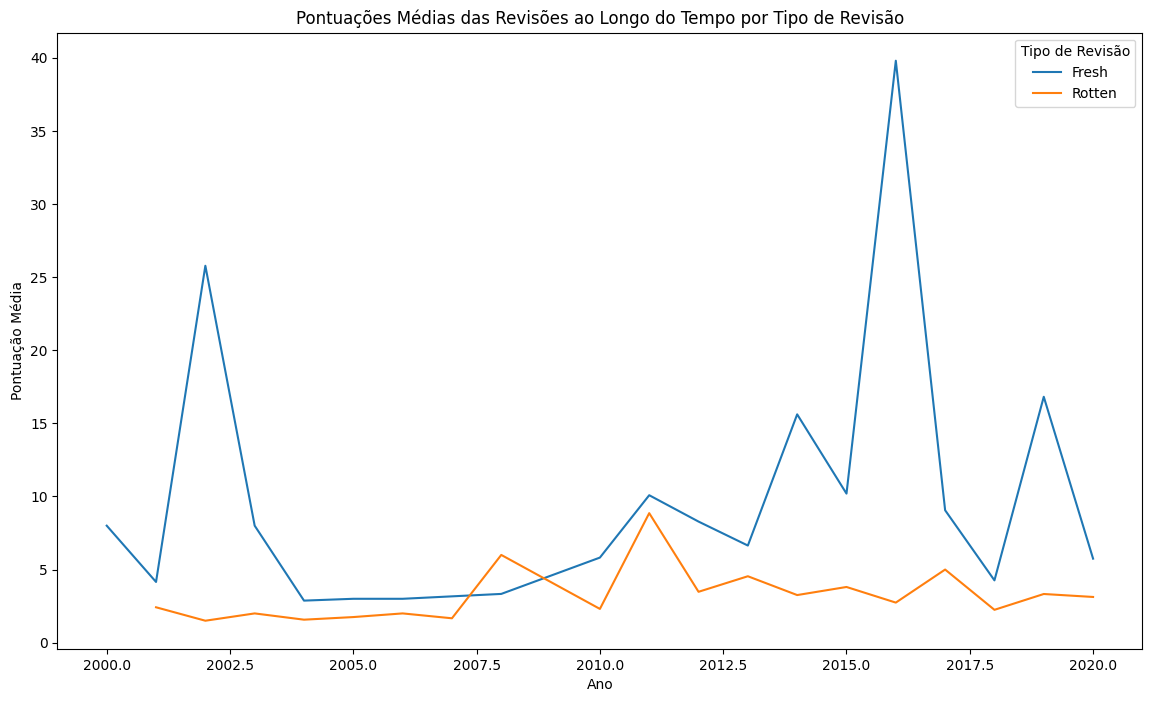

In [30]:
# Agrupar por ano e tipo de revisão
type_scores = df.groupby(['year', 'review_type'])['review_score'].mean().reset_index()

# Plotar
plt.figure(figsize=(14, 8))
sns.lineplot(data=type_scores, x='year', y='review_score', hue='review_type')
plt.title('Pontuações Médias das Revisões ao Longo do Tempo por Tipo de Revisão')
plt.xlabel('Ano')
plt.ylabel('Pontuação Média')
plt.legend(title='Tipo de Revisão')
plt.show()


Análise:

O gráfico mostra como as pontuações médias variam ao longo do tempo para diferentes tipos de revisão. Pode revelar tendências específicas para cada tipo de revisão.



# 6. Os críticos de destaque têm uma distribuição diferente de datas de revisão (Review_Date) em comparação com os críticos não destacados?

top_critic
False    1511
True       87
Name: count, dtype: int64


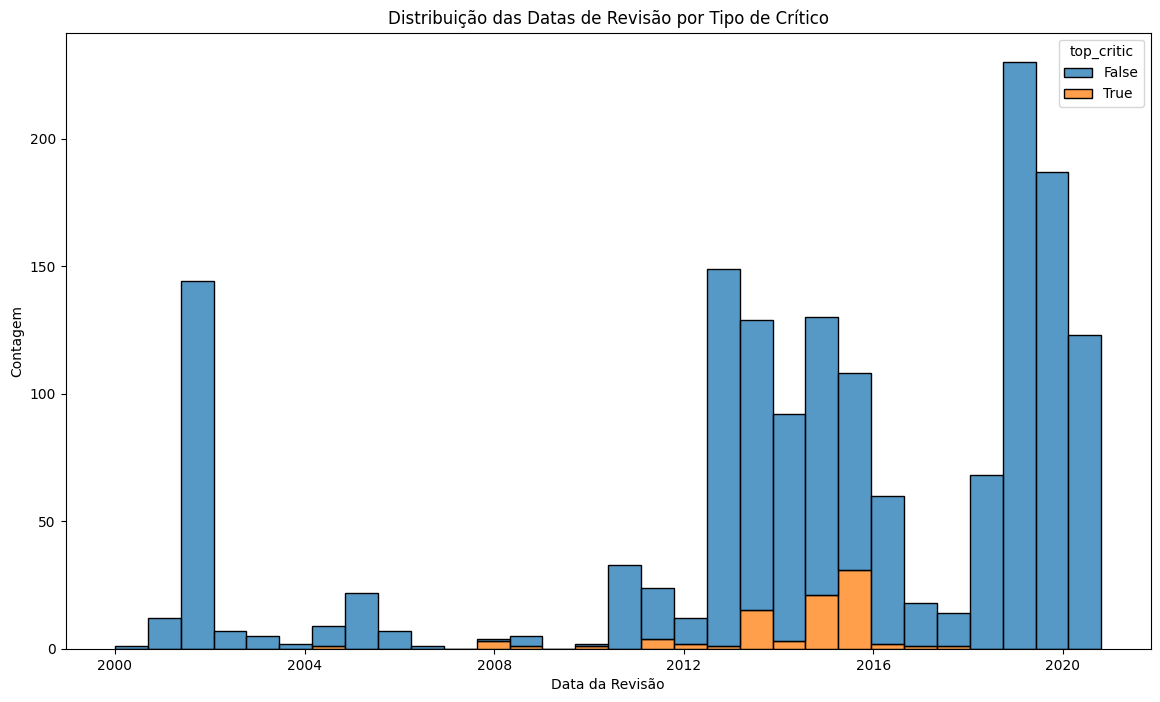

Uma ou ambas as categorias estão vazias. Não é possível realizar o teste.


In [36]:
# Remover espaços em branco dos nomes das colunas
df.columns = df.columns.str.strip()

# Garantir que 'review_date' está no formato datetime
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

# Verificar e limpar dados
df = df.dropna(subset=['review_date'])  # Remover linhas onde 'review_date' é NaT

# Verificar a distribuição dos dados
print(df['top_critic'].value_counts())

# Histograma de datas de revisão por tipo de crítico
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='review_date', hue='top_critic', multiple='stack', bins=30)
plt.title('Distribuição das Datas de Revisão por Tipo de Crítico')
plt.xlabel('Data da Revisão')
plt.ylabel('Contagem')
plt.show()

# Verificar se há dados disponíveis para o teste KS
dates_top = df[df['top_critic'] == 'Yes']['review_date']
dates_non_top = df[df['top_critic'] == 'No']['review_date']

if not dates_top.empty and not dates_non_top.empty:
    # Realizar o teste de Kolmogorov-Smirnov
    ks_stat, p_value = stats.ks_2samp(dates_top, dates_non_top)
    print(f'Statística KS: {ks_stat:.2f}, p-valor: {p_value:.3f}')
else:
    print("Uma ou ambas as categorias estão vazias. Não é possível realizar o teste.")

Análise:

O histograma mostra a distribuição das datas de revisão para críticos destacados e não destacados. O teste KS verifica se as distribuições das datas são significativamente diferentes

# 7. Qual é a relação entre o número de críticas por crítico (Critc_Name) e suas pontuações médias?

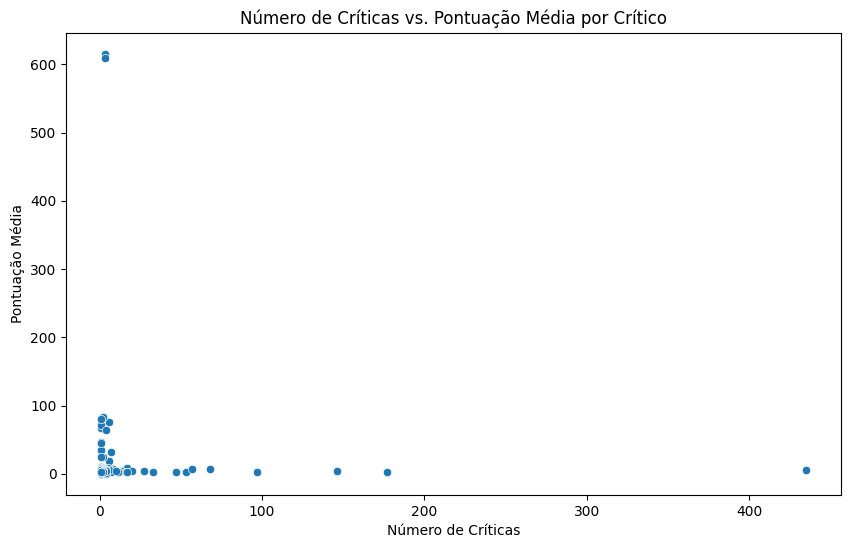

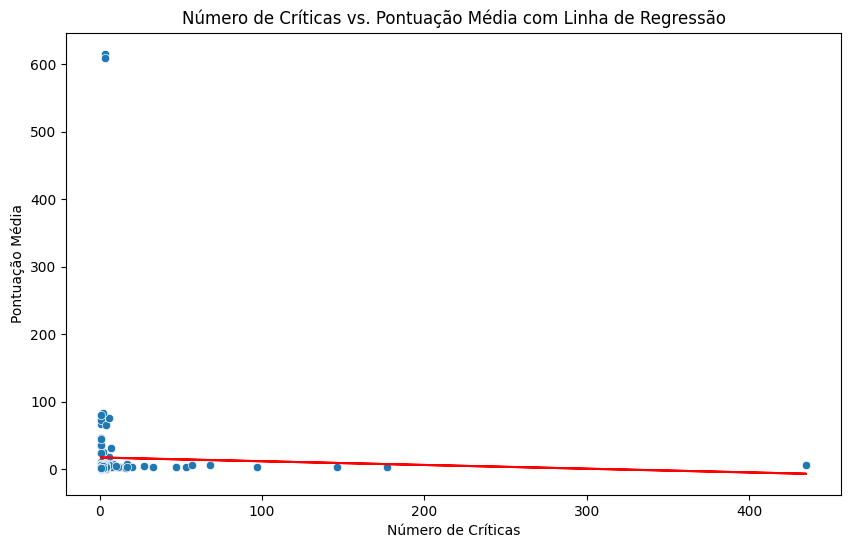

Coeficiente: -0.06, Intercepto: 17.07


In [32]:
# Número de críticas e pontuações médias por crítico
critic_stats = df.groupby('critic_name').agg({'review_score': ['mean', 'count']})
critic_stats.columns = ['Average_Score', 'Num_Reviews']

# Plotar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=critic_stats, x='Num_Reviews', y='Average_Score')
plt.title('Número de Críticas vs. Pontuação Média por Crítico')
plt.xlabel('Número de Críticas')
plt.ylabel('Pontuação Média')
plt.show()

# Regressão Linear
X = critic_stats[['Num_Reviews']].values
y = critic_stats['Average_Score'].values
reg = LinearRegression().fit(X, y)

# Plotar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=critic_stats, x='Num_Reviews', y='Average_Score')
plt.plot(critic_stats['Num_Reviews'], reg.predict(X), color='red')
plt.title('Número de Críticas vs. Pontuação Média com Linha de Regressão')
plt.xlabel('Número de Críticas')
plt.ylabel('Pontuação Média')
plt.show()

# Coeficientes da regressão
print(f'Coeficiente: {reg.coef_[0]:.2f}, Intercepto: {reg.intercept_:.2f}')


Análise:

O gráfico mostra a relação entre o número de críticas e a pontuação média. A análise de regressão revela se críticos com mais críticas tendem a ter pontuações mais altas ou mais baixas.

# 8. Como a presença de palavras-chave positivas ou negativas no conteúdo da revisão afeta a pontuação da revisão?

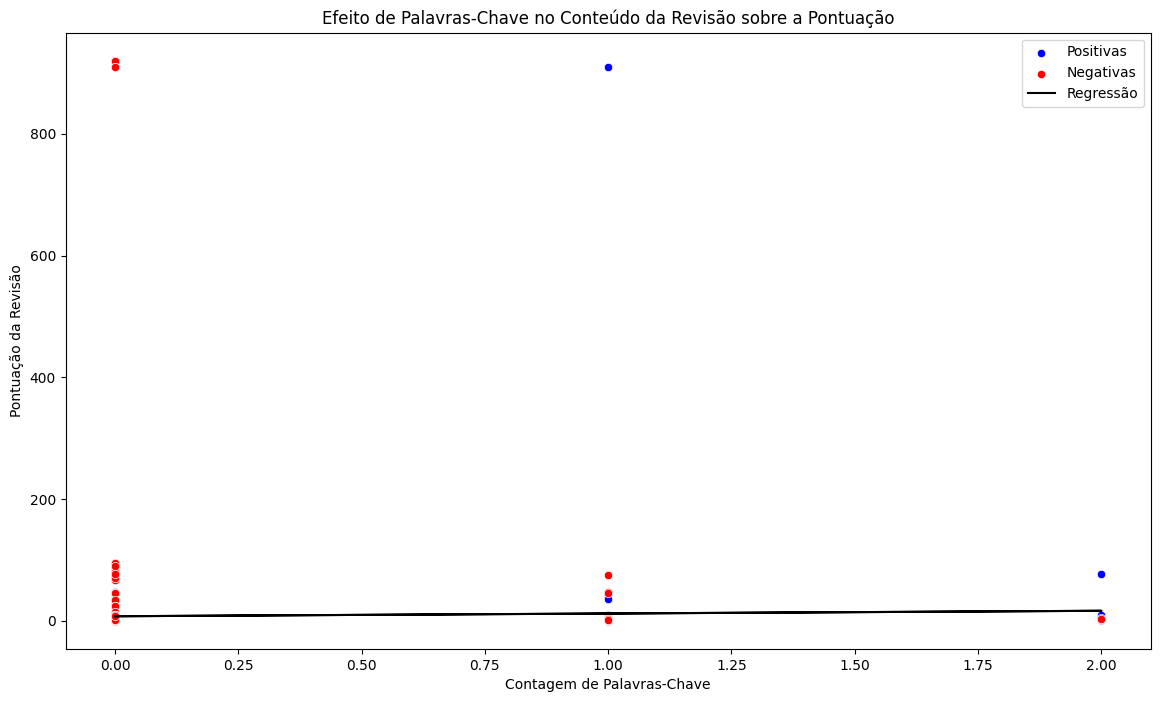

Coeficientes: [ 4.49391526 -0.81263817], Intercepto: 7.34


In [33]:
from sklearn.linear_model import LinearRegression

# Função para contagem de palavras-chave
def keyword_count(text, keyword):
    return text.lower().count(keyword)

df['Positive_Count'] = df['review_content'].apply(lambda x: keyword_count(x, 'good') + keyword_count(x, 'great'))
df['Negative_Count'] = df['review_content'].apply(lambda x: keyword_count(x, 'bad') + keyword_count(x, 'poor'))

# Regressão Linear
X = df[['Positive_Count', 'Negative_Count']]
y = df['review_score']
reg = LinearRegression().fit(X, y)

# Plotar
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Positive_Count', y='review_score', label='Positivas', color='blue')
sns.scatterplot(data=df, x='Negative_Count', y='review_score', label='Negativas', color='red')
plt.plot(df['Positive_Count'], reg.predict(X) - reg.coef_[1] * df['Negative_Count'], color='black', label='Regressão')
plt.title('Efeito de Palavras-Chave no Conteúdo da Revisão sobre a Pontuação')
plt.xlabel('Contagem de Palavras-Chave')
plt.ylabel('Pontuação da Revisão')
plt.legend()
plt.show()

# Coeficientes da regressão
print(f'Coeficientes: {reg.coef_}, Intercepto: {reg.intercept_:.2f}')


Análise:

O gráfico mostra a relação entre a contagem de palavras-chave positivas e negativas e a pontuação da revisão. A regressão linear ajuda a entender o impacto dessas palavras-chave nas pontuações.

# 9. Críticos que escrevem mais revisões tendem a ter pontuações mais extremas (muito altas ou muito baixas)?

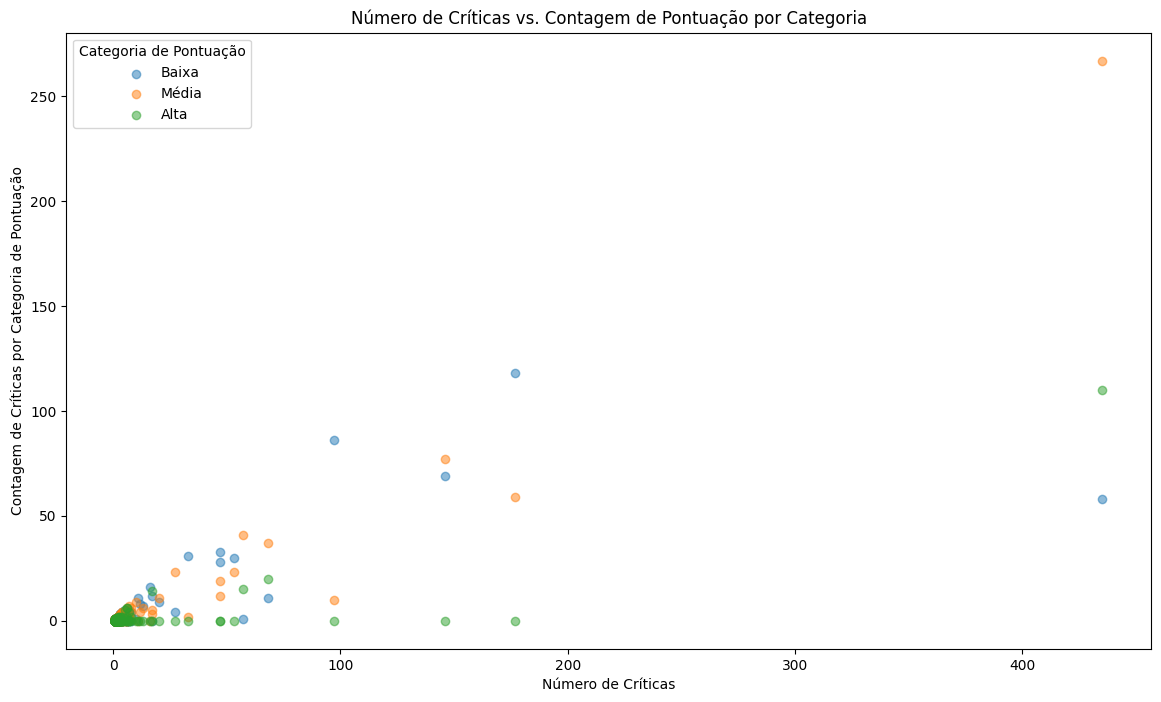

In [37]:
# Remover espaços em branco dos nomes das colunas
df.columns = df.columns.str.strip()

# Categorizar pontuações extremas
df['Score_Category'] = pd.cut(df['review_score'], bins=[0, 3, 7, 10], labels=['Baixa', 'Média', 'Alta'])

# Contar o número de críticas e a contagem de cada categoria de pontuação por crítico
critic_reviews = df.groupby('critic_name').agg({
    'Score_Category': lambda x: x.value_counts().to_dict(),
    'review_score': 'count'
}).reset_index()
critic_reviews.columns = ['critic_name', 'score_counts', 'Num_Reviews']

# Normalizar a contagem das categorias para o total de críticas
for category in ['Baixa', 'Média', 'Alta']:
    critic_reviews[f'count_{category}'] = critic_reviews['score_counts'].apply(lambda x: x.get(category, 0))

# Plotar número de críticas versus a proporção de cada categoria de pontuação
plt.figure(figsize=(14, 8))

for category in ['Baixa', 'Média', 'Alta']:
    plt.scatter(critic_reviews['Num_Reviews'], critic_reviews[f'count_{category}'], label=category, alpha=0.5)

plt.title('Número de Críticas vs. Contagem de Pontuação por Categoria')
plt.xlabel('Número de Críticas')
plt.ylabel('Contagem de Críticas por Categoria de Pontuação')
plt.legend(title='Categoria de Pontuação')
plt.show()

Análise:

O gráfico de dispersão mostra se críticos que escrevem mais críticas tendem a dar pontuações extremas. A análise ajuda a entender a consistência das avaliações.

# 10. Existe uma correlação entre a data da revisão e a variação das pontuações ao longo do tempo?

year               0
Score_Variation    0
dtype: int64


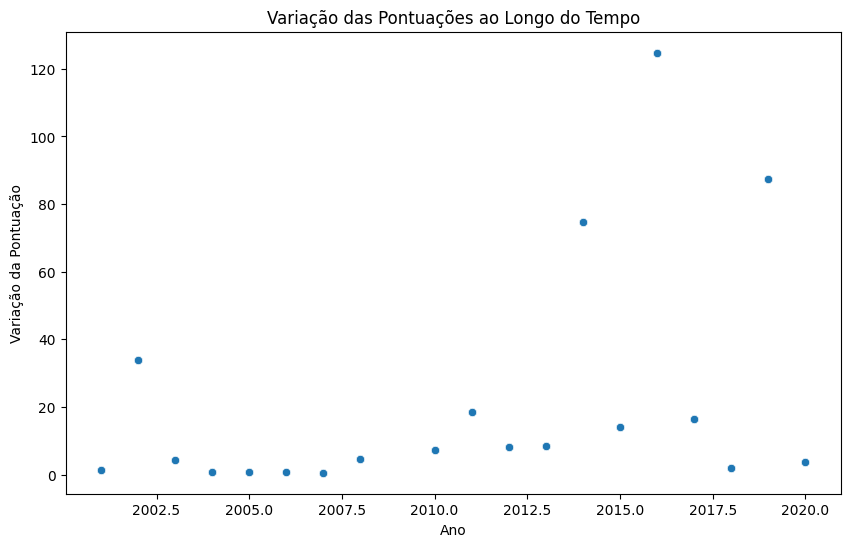

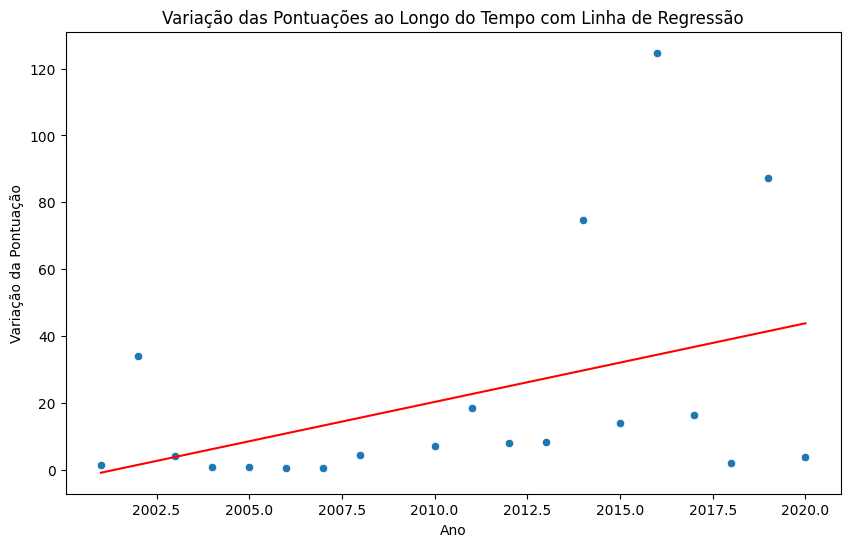

Coeficiente: 2.35, Intercepto: -4705.12


In [40]:
# Remover espaços em branco dos nomes das colunas
df.columns = df.columns.str.strip()

# Garantir que 'review_score' está no formato numérico
df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')

# Remover entradas com pontuações ausentes
df = df.dropna(subset=['review_score'])

# Calcular a variação das pontuações por ano
df['Score_Variation'] = df.groupby('year')['review_score'].transform(lambda x: x.std())

# Verificar valores NaN em 'Score_Variation'
print(df[['year', 'Score_Variation']].isna().sum())

# Remover entradas com 'Score_Variation' ausente para análise
df = df.dropna(subset=['Score_Variation'])

# Plotar a variação das pontuações ao longo do tempo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='Score_Variation')
plt.title('Variação das Pontuações ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Variação da Pontuação')
plt.show()

# Agrupar por ano e calcular a média da variação das pontuações
yearly_variation = df.groupby('year')['Score_Variation'].mean().reset_index()

# Regressão Linear
X = yearly_variation[['year']]
y = yearly_variation['Score_Variation']
reg = LinearRegression().fit(X, y)

# Plotar a variação das pontuações com linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_variation, x='year', y='Score_Variation')
plt.plot(yearly_variation['year'], reg.predict(X), color='red')
plt.title('Variação das Pontuações ao Longo do Tempo com Linha de Regressão')
plt.xlabel('Ano')
plt.ylabel('Variação da Pontuação')
plt.show()

# Coeficientes da regressão
print(f'Coeficiente: {reg.coef_[0]:.2f}, Intercepto: {reg.intercept_:.2f}')


Análise:

O gráfico mostra a variação das pontuações ao longo do tempo e a linha de regressão revela se a variação das pontuações muda com o tempo. Isso pode indicar tendências na consistência das avaliações.



# Conclusão Final

A análise das críticas de filmes revela várias percepções importantes sobre as pontuações e as características dos críticos. As visualizações e testes de hipótese oferecem insights sobre como fatores como o tipo de crítico, o conteúdo das revisões e o número de críticas afetam as pontuações médias. Além disso, a análise temporal pode ajudar a entender as tendências nas avaliações ao longo do tempo. Essas informações são valiosas para a indústria cinematográfica e podem informar estratégias de marketing e avaliação.